In [ ]:
!pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf #yahoo finance
import matplotlib.pyplot as plt


**Descargar cada sector por separado**

In [11]:
# Descargar los datos históricos de los precios de cierre ajustados de cada sector
# Los datos se descargan de Yahoo Finance usando el paquete yfinance
tickers1 = ["XLC"]
start_date = "2000-01-01"
end_date = "2022-12-31"
df1 = yf.download(tickers1, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [13]:
df1.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-19,49.700001,50.060001,49.580002,49.959999,48.000610,16600
2018-06-20,50.450001,50.889000,50.450001,50.580002,48.596302,190000


In [16]:
# Agregar una nueva columna con el sector al que pertenecen los datos
df1=df1.assign(sector='XLC')

In [18]:
df1.head(2)

,Open,High,Low,Close,Adj Close,Volume,sector
Date,,,,,,,
2018-06-19,49.700001,50.060001,49.580002,49.959999,48.000610,16600,XLC
2018-06-20,50.450001,50.889000,50.450001,50.580002,48.596302,190000,XLC


In [34]:
tickers2 = ["XLY"]
start_date = "2000-01-01"
end_date = "2022-12-31"
df2 = yf.download(tickers2, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [35]:
df2=df2.assign(sector='XLY')

In [22]:
tickers3 = ["XLP"]
start_date = "2000-01-01"
end_date = "2022-12-31"
df3 = yf.download(tickers3, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [36]:
df3=df3.assign(sector='XLP')

In [37]:
tickers4 = ["XLE"]
start_date = "2000-01-01"
end_date = "2022-12-31"
df4 = yf.download(tickers4, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [38]:
df4=df4.assign(sector='XLE')

In [39]:
tickers5 = ["XLF"]
start_date = "2000-01-01"
end_date = "2022-12-31"
df5 = yf.download(tickers5, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [40]:
df5=df5.assign(sector='XLF')

In [41]:
tickers6 = ["XLV"]
start_date = "2000-01-01"
end_date = "2022-12-31"
df6 = yf.download(tickers6, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [42]:
df6=df6.assign(sector='XLV')

In [43]:
tickers7 = ["XLI"]
start_date = "2000-01-01"
end_date = "2022-12-31"
df7 = yf.download(tickers7, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [44]:
df7=df7.assign(sector='XLI')

In [45]:
tickers8 = ["XLB"]
start_date = "2000-01-01"
end_date = "2022-12-31"
df8 = yf.download(tickers8, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [46]:
df8=df8.assign(sector='XLB')

In [47]:
tickers9 = ["XLRE"]
start_date = "2000-01-01"
end_date = "2022-12-31"
df9 = yf.download(tickers9, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [48]:
df9=df9.assign(sector='XLRE')

In [49]:
tickers10 = ["XLK"]
start_date = "2000-01-01"
end_date = "2022-12-31"
df10 = yf.download(tickers10, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [50]:
df10=df10.assign(sector='XLK')

In [51]:
tickers11 = ["XLU"]
start_date = "2000-01-01"
end_date = "2022-12-31"
df11 = yf.download(tickers11, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [52]:
df11=df11.assign(sector='XLU')

In [53]:
#Concatenar todos los sectores en un solo dataframe
df_sec = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])

In [57]:
# Revisar si hay valores nulos
df_sec.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
sector       0
dtype: int64

In [58]:
#Guardar el dataset en un csv
#df_sec.to_csv('sectores.csv')

**El porcentaje de cada sector**

In [65]:
# Llamar el archivo antes guardado para trabajar en local
dona = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projec02/sectores.csv')

In [66]:
# Agrupo los datos por sector y cuento la cantidad de veces que aparece cada sector
sector_counts = dona.groupby('sector').size()

In [67]:
# Calculo los porcentajes de cada sector
sector_percentages = sector_counts * 100 / len(dona)

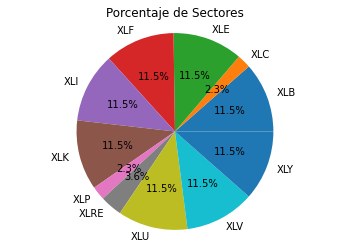

In [63]:
#Graficar
plt.pie(sector_percentages, labels=sector_percentages.index, autopct='%1.1f%%')
plt.title('Porcentaje de Sectores')
plt.axis('equal')
plt.show()

Comparación del comportamiento de los sectores

In [76]:
# Llamar el archivo antes guardado para trabajar en local
dfc= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projec02/sectores.csv')

In [85]:
# Agrupo los datos por sector
sectors = dfc.groupby("sector")

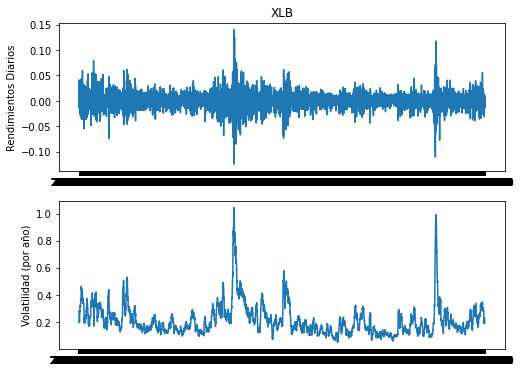

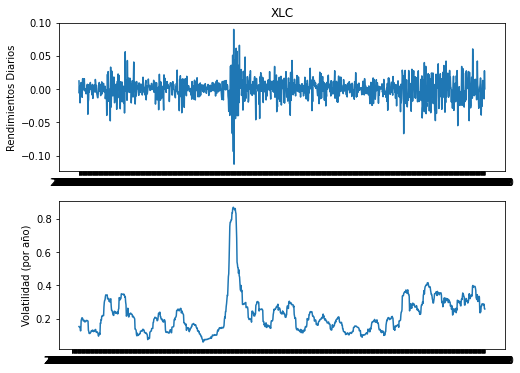

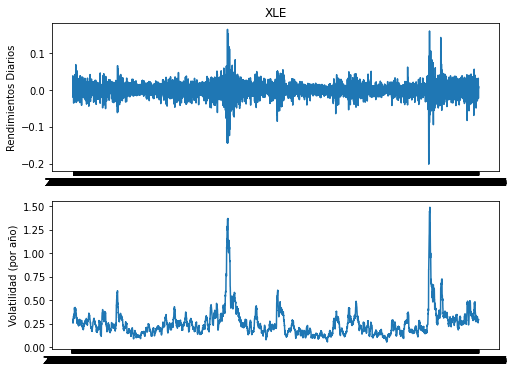

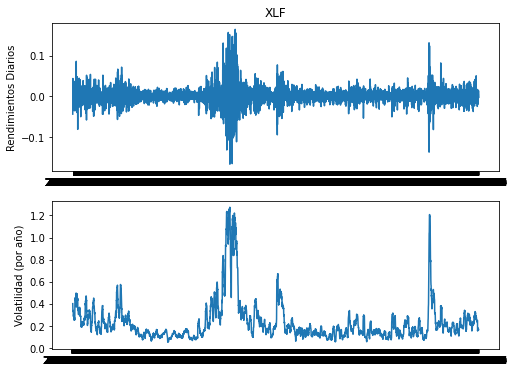

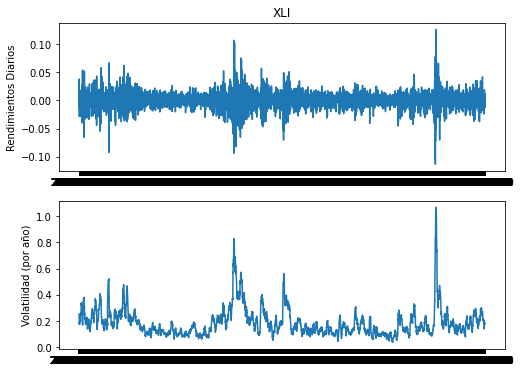

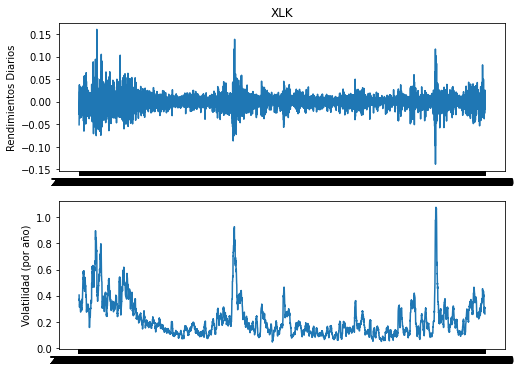

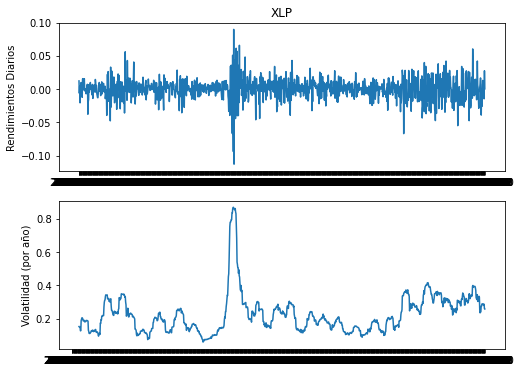

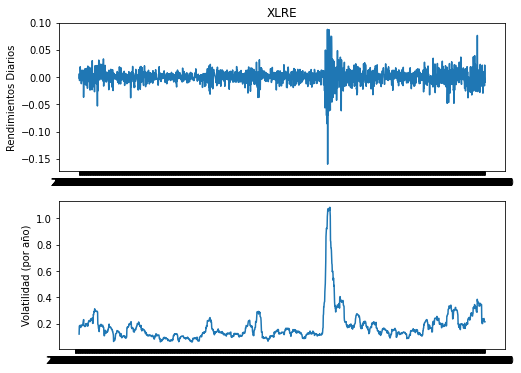

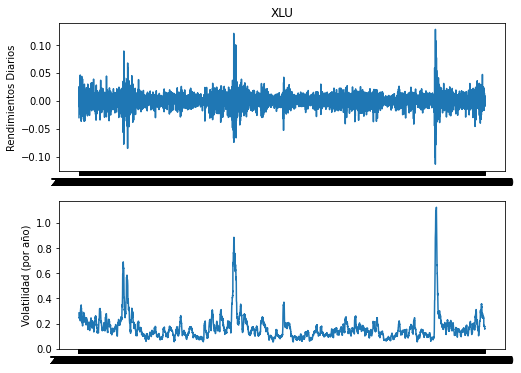

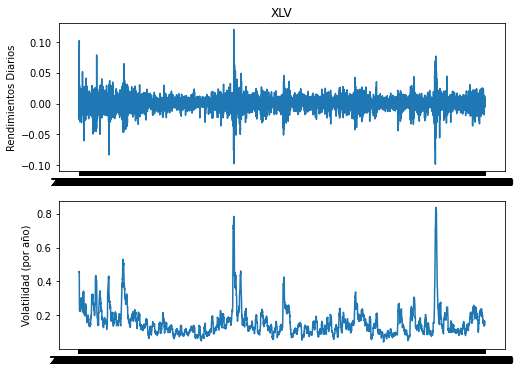

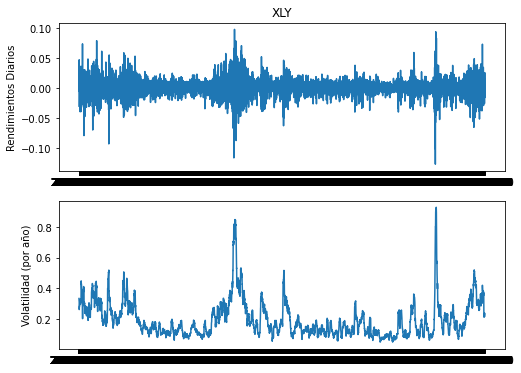

In [89]:
# Itera sobre los grupos de sectores
for name, sector in sectors:
    # Calcula los rendimientos diarios del sector
    returns = (sector["Close"] - sector["Close"].shift(1)) / sector["Close"].shift(1)
    # Calcula la volatilidad diaria del sector
    volatility = returns.rolling(window=20).std() * (252**0.5)
    # Grafica los rendimientos diarios y la volatilidad diaria del sector
    fig, axs = plt.subplots(2, 1, figsize=(8,6))
    axs[0].plot(sector["Date"], returns)
    axs[0].set_title(name)
    axs[0].set_ylabel("Rendimientos Diarios")
    axs[1].plot(sector["Date"], volatility)
    axs[1].set_ylabel("Volatilidad (por año)")
    plt.show()

La gráfica de rendimientos diarios muestra cómo varía el precio de cierre de cada sector en el S&P 500 de un día a otro, expresado como un porcentaje de cambio. Si el rendimiento diario es positivo, significa que el precio de cierre de ese día fue más alto que el del día anterior, y si es negativo, significa que el precio de cierre fue más bajo que el del día anterior.

La gráfica de volatilidad muestra cómo varía la variabilidad o dispersión de los rendimientos diarios de un sector en el S&P 500 a lo largo del tiempo, también expresado como un porcentaje de cambio. Una volatilidad alta significa que los precios de cierre de un sector están cambiando mucho de un día a otro, mientras que una volatilidad baja significa que los precios de cierre están cambiando poco.

Interpretando ambas gráficas juntas, se puede obtener una idea del riesgo y la rentabilidad de cada sector. Por ejemplo, un sector con un rendimiento diario alto y una volatilidad baja puede ser considerado menos riesgoso que un sector con un rendimiento diario bajo y una volatilidad alta. Sin embargo, es importante recordar que el rendimiento pasado no garantiza el rendimiento futuro, y que cada inversor debe considerar sus objetivos y tolerancia al riesgo antes de tomar decisiones de inversión.

**Vamos a definir el sector más estable y con menos riesgo de inverión**

Calculo la volatilidad anualizada promedio de cada sector y los ordeno de menor a mayor. El sector con la volatilidad más baja será considerado el más estable y con menos riesgo de inversión.

In [90]:
# Calcula la volatilidad anualizada promedio de cada sector
volatility2 = sectors.apply(lambda x: (x["Close"] - x["Close"].shift(1)) / x["Close"].shift(1)).rolling(window=20).std() * (252**0.5)
volatility2 = volatility2.groupby("sector").mean()

In [91]:
# Ordena los sectores de menor a mayor volatilidad anualizada promedio
volatility2 = volatility2.sort_values()

In [92]:
volatility2

sector
XLV     0.160278
XLU     0.168054
XLRE    0.180091
XLI     0.189384
XLY     0.197702
XLB     0.215923
XLK     0.221680
XLC     0.224045
XLP     0.224045
XLF     0.234602
XLE     0.256807
Name: Close, dtype: float64

El sector **XLV** que concierne a la Salud médica es el más estable en los últimos 23 años